Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8670 - loss: 0.5256 - val_accuracy: 0.9207 - val_loss: 0.3127
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9278 - loss: 0.2945 - val_accuracy: 0.9207 - val_loss: 0.2832
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9280 - loss: 0.2565 - val_accuracy: 0.9207 - val_loss: 0.2700
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9263 - loss: 0.2624 - val_accuracy: 0.9207 - val_loss: 0.2650
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9276 - loss: 0.2547 - val_accuracy: 0.9207 - val_loss: 0.2641
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9184 - loss: 0.2704 - val_accuracy: 0.9207 - val_loss: 0.2666
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9213 - loss: 0.2588 - val_accuracy: 0.9165 - val_loss: 0.2644
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9214 - loss: 0.2581 - val_accuracy: 0.9207 - val_loss:

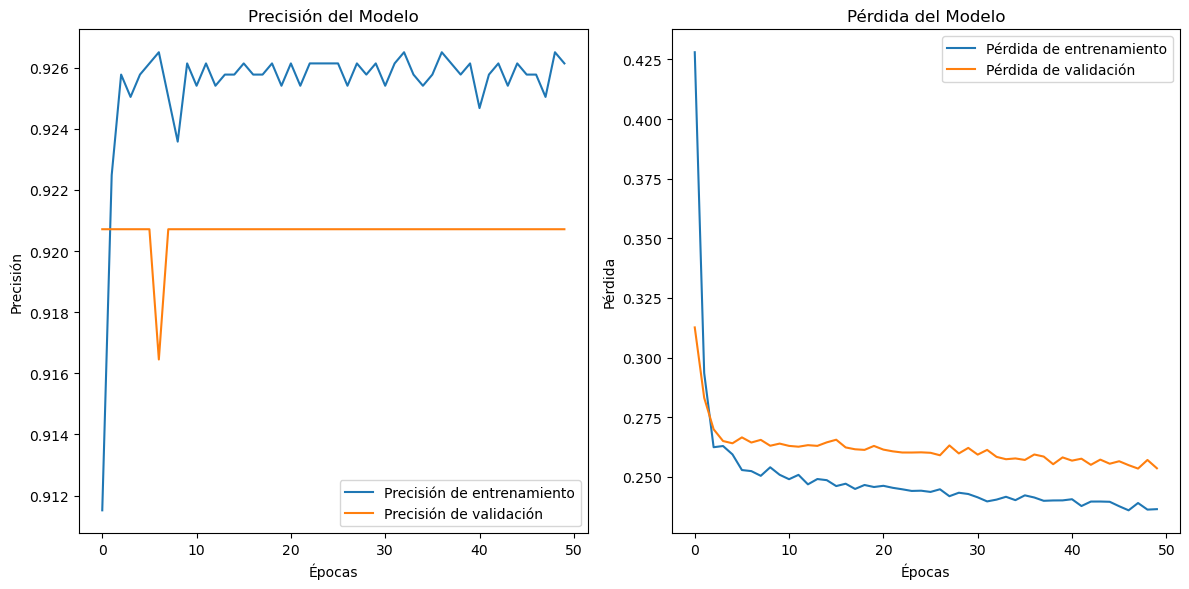

In [346]:
#REDES NEURONALES
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt

# Crear la columna RedesNeuronales basada en reglas personalizadas
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['RedesNeuronales'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos
# Usar componentes principales o columnas relevantes como predictores
columnas_pca = ['PC1', 'PC2']  # Cambia a las columnas relevantes si no usas PCA
X = data[columnas_pca]
y = data['RedesNeuronales']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar la variable objetivo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.3, random_state=42)

# Construcción del modelo de red neuronal
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Define explícitamente la forma de entrada
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en prueba: {loss}")
print(f"Precisión en prueba: {accuracy}")

# Graficar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8934 - loss: 0.5411 - val_accuracy: 0.9207 - val_loss: 0.3279
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9260 - loss: 0.2897 - val_accuracy: 0.9207 - val_loss: 0.2873
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9194 - loss: 0.2953 - val_accuracy: 0.9207 - val_loss: 0.2693
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9264 - loss: 0.2552 - val_accuracy: 0.9207 - val_loss: 0.2664
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9323 - loss: 0.2405 - val_accuracy: 0.9207 - val_loss: 0.2681
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9263 - loss: 0.2476 - val_accuracy: 0.9156 - val_loss: 0.2677
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9267 - loss: 0.2523 - val_accuracy: 0.9207 - val_loss: 0.2674
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9326 - loss: 0.2323 - val_accuracy: 0.9207 - 

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9367 - loss: 0.2183 - val_accuracy: 0.9207 - val_loss: 0.2501
Epoch 52/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9230 - loss: 0.2439 - val_accuracy: 0.9207 - val_loss: 0.2540
Epoch 53/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9281 - loss: 0.2324 - val_accuracy: 0.9207 - val_loss: 0.2517
Epoch 54/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9265 - loss: 0.2386 - val_accuracy: 0.9207 - val_loss: 0.2491
Epoch 55/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9321 - loss: 0.2231 - val_accuracy: 0.9207 - val_loss: 0.2485
Epoch 56/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9231 - loss: 0.2388 - val_accuracy: 0.9207 - val_loss: 0.2500
Epoch 57/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9216 - loss: 0.2428 - val_accuracy: 0.9207 - val_loss: 0.2511
Epoch 58/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9288 - loss: 0.2316 - val_accuracy: 0.9207 - val_lo

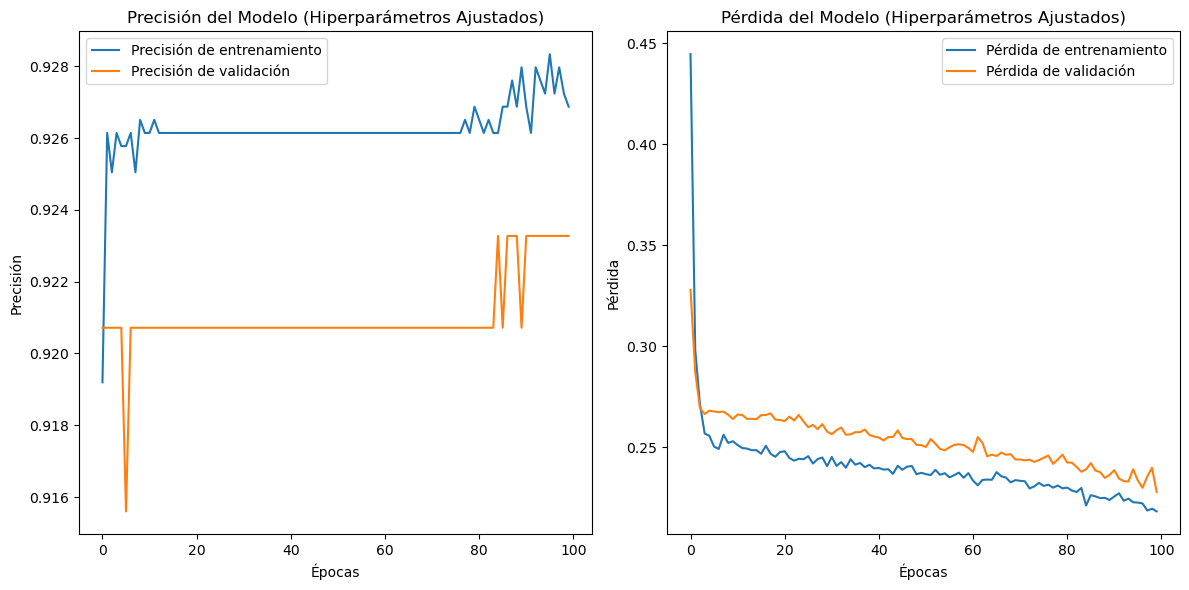

In [348]:
#REDES NEURONALES con ajuste de parametros
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt

# Crear la columna target basada en reglas personalizadas
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['RedesNeuronales'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos
# Usar componentes principales o columnas relevantes como predictores
columnas_pca = ['PC1', 'PC2']  
X = data[columnas_pca]
y = data['RedesNeuronales']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar la variable objetivo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.3, random_state=42)



# Adjusted model definition
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Explicitly define the input shape
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)


# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en prueba: {loss}")
print(f"Precisión en prueba: {accuracy}")

# Graficar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión del Modelo (Hiperparámetros Ajustados)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida del Modelo (Hiperparámetros Ajustados)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7455 - loss: 0.6342 - val_accuracy: 0.9207 - val_loss: 0.4675
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9323 - loss: 0.4134 - val_accuracy: 0.9207 - val_loss: 0.3349
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9331 - loss: 0.3042 - val_accuracy: 0.9207 - val_loss: 0.3034
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9163 - loss: 0.3183 - val_accuracy: 0.9207 - val_loss: 0.2926
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9245 - loss: 0.2775 - val_accuracy: 0.9207 - val_loss: 0.2824
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9233 - loss: 0.2715 - val_accuracy: 0.9207 - val_loss: 0.2722
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9240 - loss: 0.2786 - val_accuracy: 0.9207 - val_loss: 0.2683
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9213 - loss: 0.2738 - val_accuracy: 0.9207 - 

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9214 - loss: 0.2446 - val_accuracy: 0.9207 - val_loss: 0.2607
Epoch 52/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9223 - loss: 0.2539 - val_accuracy: 0.9207 - val_loss: 0.2615
Epoch 53/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9288 - loss: 0.2374 - val_accuracy: 0.9207 - val_loss: 0.2605
Epoch 54/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9296 - loss: 0.2302 - val_accuracy: 0.9207 - val_loss: 0.2591
Epoch 55/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9228 - loss: 0.2542 - val_accuracy: 0.9207 - val_loss: 0.2607
Epoch 56/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9213 - loss: 0.2548 - val_accuracy: 0.9207 - val_loss: 0.2603
Epoch 57/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9284 - loss: 0.2327 - val_accuracy: 0.9207 - val_loss: 0.2592
Epoch 58/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9370 - loss: 0.2168 - val_accuracy: 0.9207 - val_lo

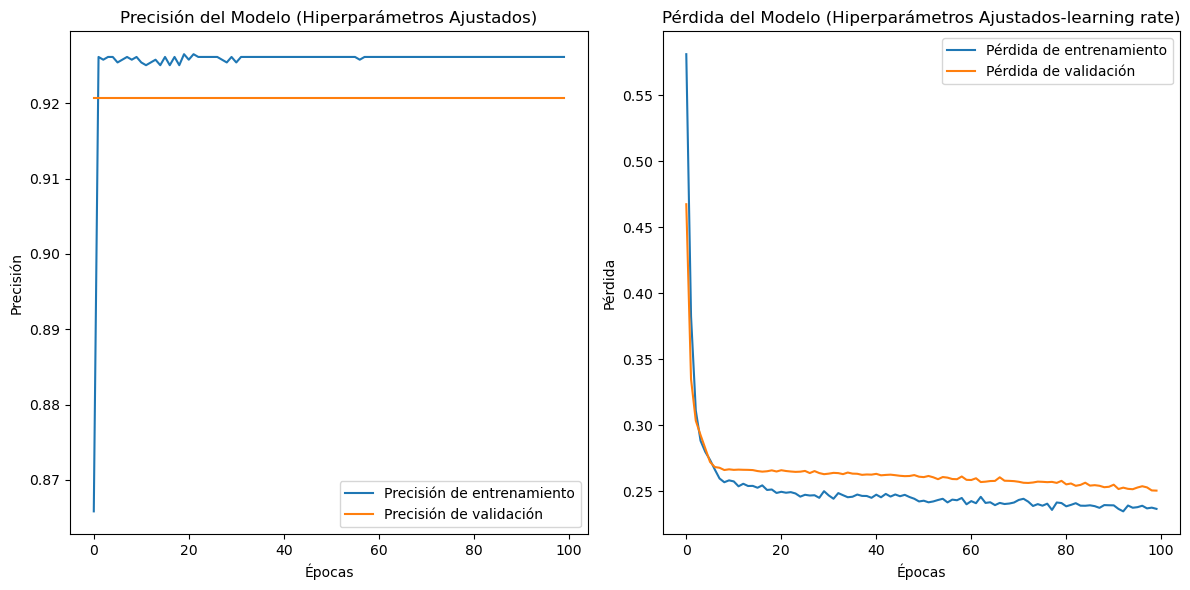

In [349]:
#REDES NEURONALES con ajuste de parametros/ajustando learning rate Ajustar, tasa de aprendizaje  con learning_rate=0.0005
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt

# Crear la columna RedesNeuronales3 basada en reglas personalizadas
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['RedesNeuronales3'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos
# Usar componentes principales o columnas relevantes como predictores
columnas_pca = ['PC1', 'PC2']  
X = data[columnas_pca]
y = data['RedesNeuronales3']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar la variable objetivo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.3, random_state=42)



# Adjusta
model = Sequential()
model.add(Input(shape=(X_train.shape[1],))) 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo
optimizer = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)


# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en prueba: {loss}")
print(f"Precisión en prueba: {accuracy}")

# Graficar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión del Modelo (Hiperparámetros Ajustados)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida del Modelo (Hiperparámetros Ajustados-learning rate)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6216 - loss: 0.6693 - val_accuracy: 0.6725 - val_loss: 0.6279
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6500 - loss: 0.6490 - val_accuracy: 0.6725 - val_loss: 0.6149
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6624 - loss: 0.6265 - val_accuracy: 0.6725 - val_loss: 0.6101
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6630 - loss: 0.6245 - val_accuracy: 0.6642 - val_loss: 0.6017
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6747 - loss: 0.6123 - val_accuracy: 0.6757 - val_loss: 0.5994
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6747 - loss: 0.6038 - val_accuracy: 0.6661 - val_loss: 0.5915
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6831 - loss: 0.5994 - val_accuracy: 0.7039 - val_loss: 0.5868
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6761 - loss: 0.5932 - val_accuracy: 0.6702 -

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8098 - loss: 0.3850 - val_accuracy: 0.8326 - val_loss: 0.3251
Epoch 52/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8045 - loss: 0.3900 - val_accuracy: 0.8399 - val_loss: 0.3272
Epoch 53/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8047 - loss: 0.3886 - val_accuracy: 0.8326 - val_loss: 0.3210
Epoch 54/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8262 - loss: 0.3530 - val_accuracy: 0.8312 - val_loss: 0.3251
Epoch 55/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8149 - loss: 0.3719 - val_accuracy: 0.8413 - val_loss: 0.3186
Epoch 56/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8129 - loss: 0.3774 - val_accuracy: 0.8326 - val_loss: 0.3161
Epoch 57/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8127 - loss: 0.3767 - val_accuracy: 0.8399 - val_loss: 0.3202
Epoch 58/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8044 - loss: 0.3855 - val_accuracy: 0.8326 - val_lo

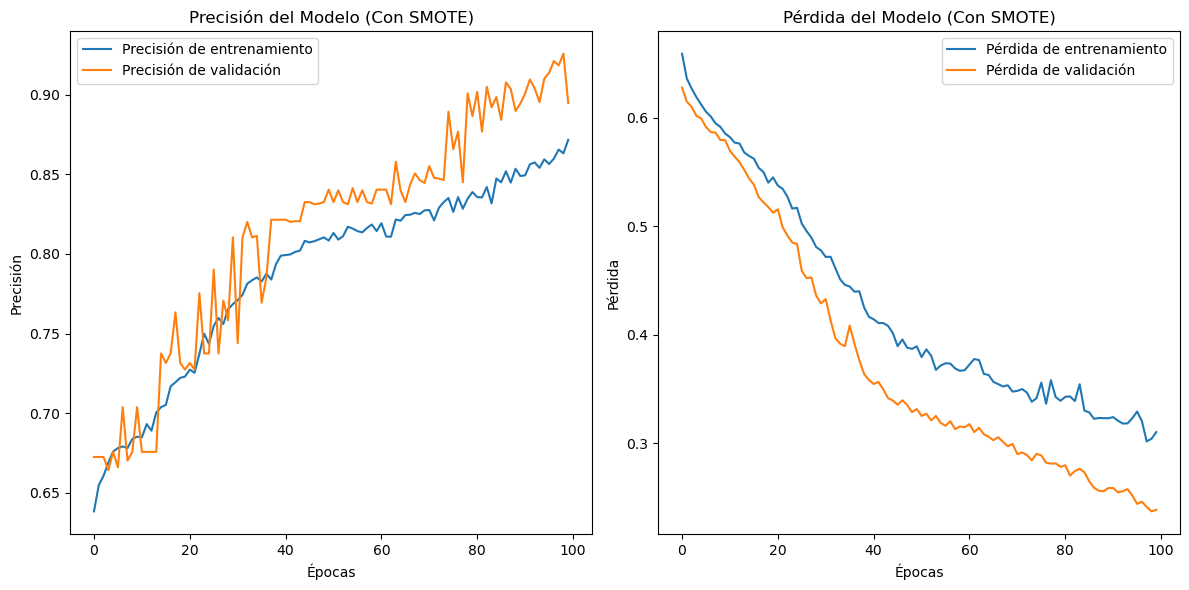

In [350]:
# Redes Neuronales con smote
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Crear la columna RedesNeuronalesSmote basada en reglas personalizadas
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['RedesNeuronalesSmote'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos
# Usar componentes principales o columnas relevantes como predictores
columnas_pca = ['PC1', 'PC2'] 
X = data[columnas_pca]
y = data['RedesNeuronalesSmote']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar la variable objetivo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)
y_resampled_categorical = to_categorical(y_resampled)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_categorical, test_size=0.3, random_state=42)

# Definición del modelo ajustado
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Definir explícitamente la forma de entrada
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en prueba: {loss}")
print(f"Precisión en prueba: {accuracy}")

# Graficar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión del Modelo (Con SMOTE)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida del Modelo (Con SMOTE)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()
